In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

import functions
from global_gradient_methods import GlobalGradientDescent, RandomVectorDescent
from base_gradient_descent import VanillaGradientDescent, MomentumGradientDescent, AdamGradientDescent
from experiment import Experiment

# Тест на простой функции

Для начала протестируем все методы на самой простой из имеющихся функций, чтобы проверить, что они все верно реализованны и работают корректно на базовом случае. 

Для первого эксперимента используется самая простая функция для оптимизации: простая сумма квадратов координат. Эта функция имеет один локальный и глобальный минимум, градиент функции считается очень просто, и она симметричная. Ожидается, что все методы, как базовые, так и глобальные справятся с оптимизацией данной функции.

In [93]:
# simplest possible function
def sum_squares(x):
    return np.mean(x**2)

num_trials = 10
num_iterations = 1000
lr = 0.1
dims = 10

In [94]:
vanilla = VanillaGradientDescent(sum_squares, num_iterations, lr, dims=dims)
momentum = MomentumGradientDescent(sum_squares, num_iterations, lr, dims=dims)
adam = AdamGradientDescent(sum_squares, num_iterations, lr, dims=dims)

experiments = []
vanilla_exp = Experiment(vanilla, sum_squares, num_trials)
momentum_exp = Experiment(momentum, sum_squares, num_trials)
adam_exp = Experiment(adam, sum_squares, num_trials)

vanilla_exp.run()
momentum_exp.run()
adam_exp.run()


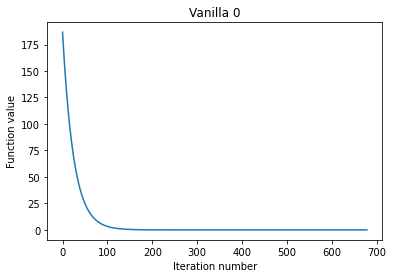

4.207435131072998 679


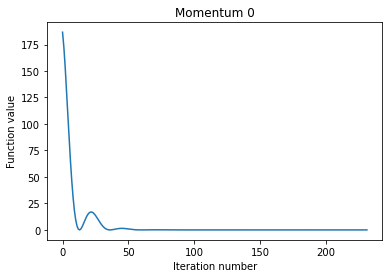

1.7824480533599854 232


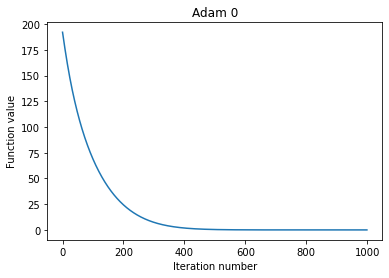

8.474616050720215 1000


In [95]:
trial_to_plot = np.random.choice(range(num_trials))

vanilla_exp.plot_trial(trial_to_plot, title='Vanilla ' + str(trial_to_plot))
momentum_exp.plot_trial(trial_to_plot, title='Momentum ' + str(trial_to_plot))
adam_exp.plot_trial(trial_to_plot, title='Adam ' + str(trial_to_plot))

In [96]:
print('Vanilla results:', vanilla_exp.average_stats())
print('Momentum results:', momentum_exp.average_stats())
print('Adam results:', adam_exp.average_stats())

Vanilla results: (5.2107658863067625, 689.8, 2.3996510597399117e-10, 2.3228984253871555e-10)
Momentum results: (2.0664132833480835, 232.0, 1.1349477511765884e-08, 4.622704492456124e-09)
Adam results: (6.889282274246216, 1000.0, 0.0027617419397706943, 5.77965189694684e-06)


Первое число метода `average_stats` означает среднее количество времени одного запуска, второе - среднее количество итераций, третье и четвертое - худшее и лучшее значение функции после оптимизации. \
\
Видно, что лучше всего из базовых методов с задачей справился `momentum`, а хуже всего `adam`. За тысячу итераций он ни разу не смог приблизиться к минимуму ближе чем на $1e-6$

In [97]:
global_desc = GlobalGradientDescent(sum_squares, num_iterations, lr, dims=dims, global_opt=0)
global_exp = Experiment(global_desc, sum_squares, num_trials)
global_exp.run()

In [98]:
print('Global results:', global_exp.average_stats())

Global results: (0.032275938987731935, 1.0, 8.626721707094311e-24, 9.936511683686495e-27)


Получили первые кажущиеся интересными, но на самом деле предсказуемые результаты. `global` справился с оптимизацией за одну итерацию и почти мгновенно по времени. Теоритическое объяснение данного факта заключается в том, что оптимизируемая функция симметричная и в любой точке направление градиента содержит глобальный минимум, то есть при адекватном выборе длины шага данный алгоритм всегда будет сходиться за одну итерацию.

In [99]:
random = RandomVectorDescent(sum_squares, num_iterations, lr, num_vectors=10, dims=dims, global_opt=0)
random_exp = Experiment(random, sum_squares, num_trials)
random_exp.run()

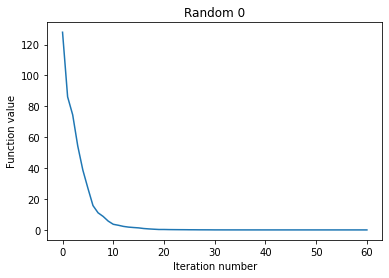

0.5658650398254395 61


In [100]:
random_exp.plot_trial(trial_to_plot, title='Random ' + str(trial_to_plot))

In [101]:
print('Random results:', random_exp.average_stats())

Random results: (0.5722141027450561, 64.2, 9.645340636278988e-07, 4.890407213019445e-07)


Алгоритм `random vectors` не мог воспользоваться преимцществом предыдущего метода, основанном на симметричности функции, но тем не менее справился с задачей оптимизации и гораздо быстрее всех базовых методов.

Все методы корректно справились с самой простой задачей оптимизации. При этом методы глобальной оптимизации на простой задаче сходились гораздо быстрее базовых методов.

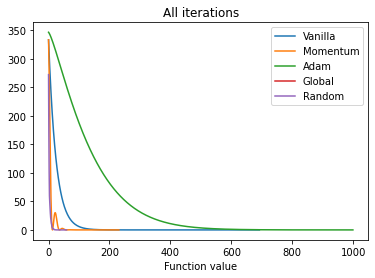

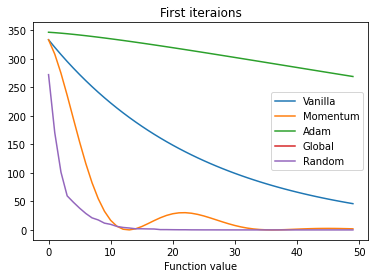

In [107]:
trial = np.random.choice(range(num_trials))
plt.plot(vanilla_exp.trial_stats[trial]['function_values'], label='Vanilla')
plt.plot(momentum_exp.trial_stats[trial]['function_values'], label='Momentum')
plt.plot(adam_exp.trial_stats[trial]['function_values'], label='Adam')
plt.plot(global_exp.trial_stats[trial]['function_values'], label='Global')
plt.plot(random_exp.trial_stats[trial]['function_values'], label='Random')

plt.title('All iterations')
plt.xlabel('Iteraion')
plt.xlabel('Function value')

plt.legend()
plt.show()

plt.plot(vanilla_exp.trial_stats[trial]['function_values'][:50], label='Vanilla')
plt.plot(momentum_exp.trial_stats[trial]['function_values'][:50], label='Momentum')
plt.plot(adam_exp.trial_stats[trial]['function_values'][:50], label='Adam')
plt.plot(global_exp.trial_stats[trial]['function_values'][:50], label='Global')
plt.plot(random_exp.trial_stats[trial]['function_values'][:50], label='Random')

plt.title('First iteraions')
plt.xlabel('Iteraion')
plt.xlabel('Function value')

plt.legend()
plt.show()

# Тест на valley-shaped функциях

### Three hump camel
Первый тест будет проходить на простой двумерной функции с одним глобальным минимумом. Единственная сложность для оптимизации в том, что минимум находится в долине.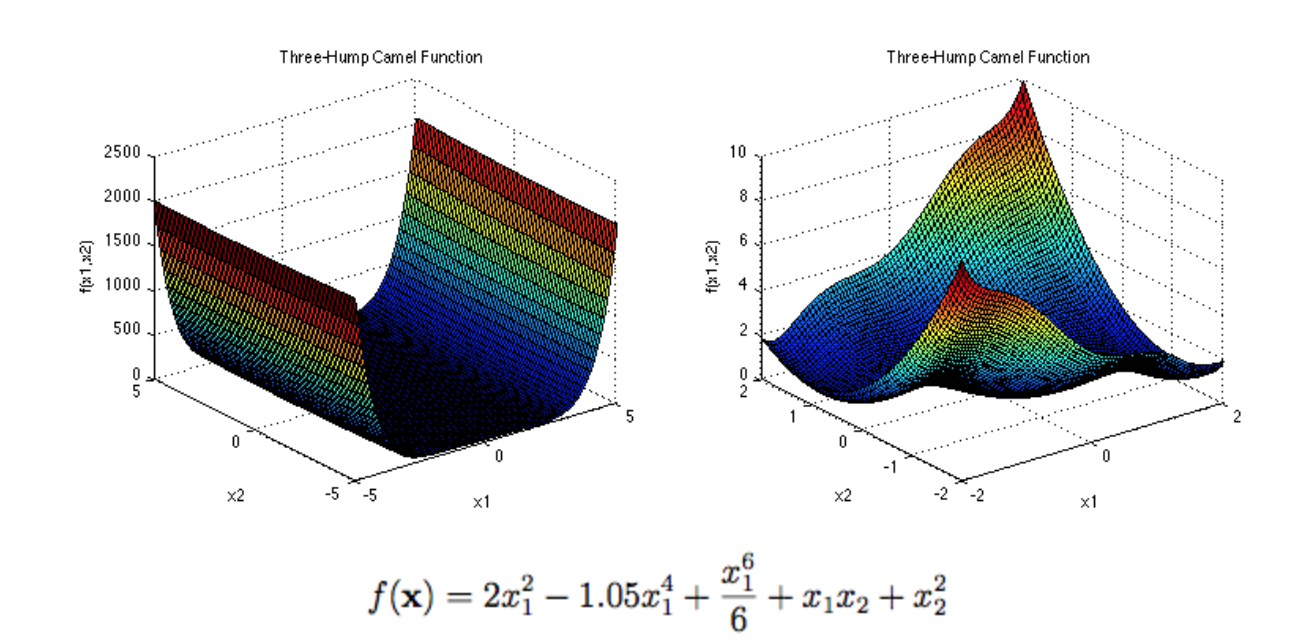

In [108]:
f = functions.three_hump_camel

num_trials = 10
num_iterations = 10000
lr = 0.001
dims = 2
bound = 5

In [109]:
vanilla = VanillaGradientDescent(f, num_iterations, lr, bound=bound, dims=dims)
momentum = MomentumGradientDescent(f, num_iterations, lr, bound=bound, dims=dims)
adam = AdamGradientDescent(f, num_iterations, lr, bound=bound, dims=dims)

vanilla_exp = Experiment(vanilla, f, num_trials)
momentum_exp = Experiment(momentum, f, num_trials)
adam_exp = Experiment(adam, f, num_trials)

vanilla_exp.run()
momentum_exp.run()
adam_exp.run()

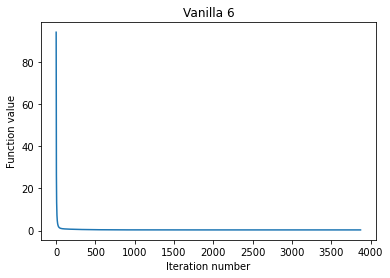

8.615663051605225 3872


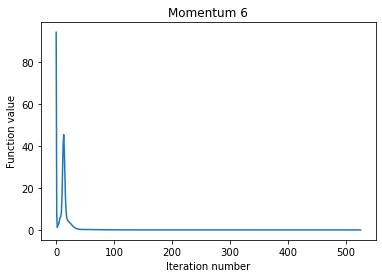

0.8846626281738281 526


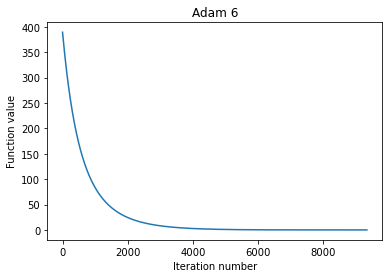

15.404914140701294 9341


In [110]:
trial_to_plot = np.random.choice(range(num_trials))

vanilla_exp.plot_trial(trial_to_plot, title='Vanilla ' + str(trial_to_plot))
momentum_exp.plot_trial(trial_to_plot, title='Momentum ' + str(trial_to_plot))
adam_exp.plot_trial(trial_to_plot, title='Adam ' + str(trial_to_plot))

In [111]:
print('Vanilla results:', vanilla_exp.average_stats())
print('Momentum results:', momentum_exp.average_stats())
print('Adam results:', adam_exp.average_stats())

Vanilla results: (9.646902298927307, 4506.1, 0.2986387038625824, 3.135574747342095e-07)
Momentum results: (0.9812044382095337, 500.9, 0.29863844372364856, 1.99992733520513e-09)
Adam results: (13.791094827651978, 7694.7, 0.35208271210205844, 6.325441533372806e-06)


Все базовые методы при правильно подобранном `lr` и количестве итераций справились с задачей. Результаты оказались похожими на результаты теста на базовой функции. `momentum` справился с задачей быстрее всех, а худший результат у `adam`.

In [112]:
lr = 0.1

global_desc = GlobalGradientDescent(f, num_iterations, lr, dims=dims, bound=bound, global_opt=0)
global_exp = Experiment(global_desc, f, num_trials)
global_exp.run()

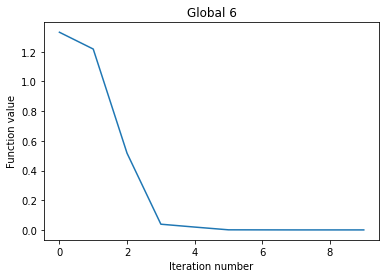

0.01647162437438965 10


In [113]:
global_exp.plot_trial(trial_to_plot, title='Global ' + str(trial_to_plot))

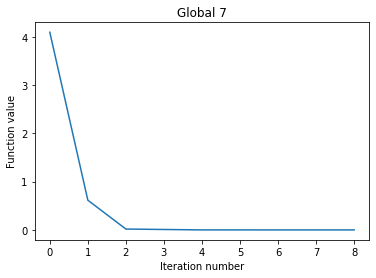

0.014489173889160156 9


In [114]:
global_exp.plot_trial(7, title='Global ' + str(7))

In [115]:
print('Global results:', global_exp.average_stats())

Global results: (2.013340783119202, 1007.1, 0.866691047907137, 6.880301261333361e-08)


Реузльтаты `global` на данной функции получились неоднозначными. При $9$ запусках из $10$ она справилась с оптимизациией гораздо быстрее, чем все базовые методы: в районе $0.1$ секунды и меньше $10$ итераций. Но в одной итерации алгоритм вообще не сошелся к минимуму.

In [116]:
random = RandomVectorDescent(f, num_iterations, lr, num_vectors=10, dims=dims, global_opt=0)
random_exp = Experiment(random, f, num_trials)
random_exp.run()

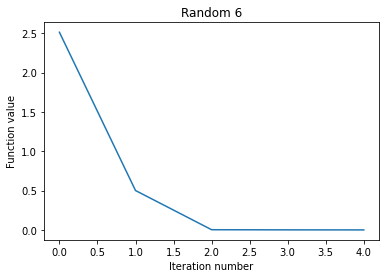

0.007579803466796875 5


In [117]:
random_exp.plot_trial(trial_to_plot, title='Random ' + str(trial_to_plot))

In [118]:
print('Random results:', random_exp.average_stats())

Random results: (0.008370423316955566, 4.8, 7.752896269772241e-07, 2.81123883475489e-10)


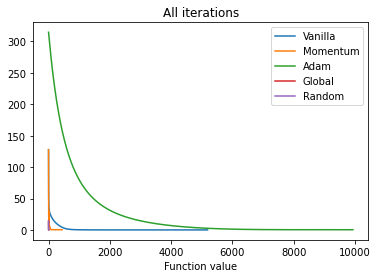

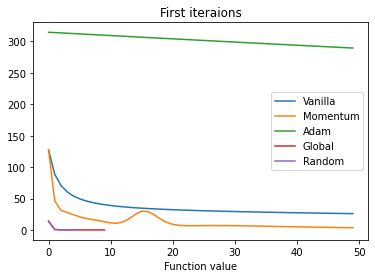

In [119]:
trial = np.random.choice(range(num_trials))
plt.plot(vanilla_exp.trial_stats[trial]['function_values'], label='Vanilla')
plt.plot(momentum_exp.trial_stats[trial]['function_values'], label='Momentum')
plt.plot(adam_exp.trial_stats[trial]['function_values'], label='Adam')
plt.plot(global_exp.trial_stats[trial]['function_values'], label='Global')
plt.plot(random_exp.trial_stats[trial]['function_values'], label='Random')

plt.title('All iterations')
plt.xlabel('Iteraion')
plt.xlabel('Function value')

plt.legend()
plt.show()

plt.plot(vanilla_exp.trial_stats[trial]['function_values'][:50], label='Vanilla')
plt.plot(momentum_exp.trial_stats[trial]['function_values'][:50], label='Momentum')
plt.plot(adam_exp.trial_stats[trial]['function_values'][:50], label='Adam')
plt.plot(global_exp.trial_stats[trial]['function_values'][:50], label='Global')
plt.plot(random_exp.trial_stats[trial]['function_values'][:50], label='Random')

plt.title('First iterations')
plt.xlabel('Iteraion')
plt.xlabel('Function value')

plt.legend()
plt.show()

Результаты `random` оказались достаточно ожидаемыми. Алгоритм оказался быстрее всех базовых, что логично, ведь основная проблема оптимизации данной функции была в затухании градиента на плато, однако у данного алгоритма этой проблемы нет. При этом из-за стохастичности выбора направления отсутствует проблема `global`, что алгоритм вообще может не сойтись.

### Rosenbrock
Второй функцией была функция Розенброка. Это классическая функция для тестирования алгоритмов оптимизации. Она оказалась достаточно сложна для оптимизации, поэтому алгоритмы тестировались только на ее двухмерной версии.
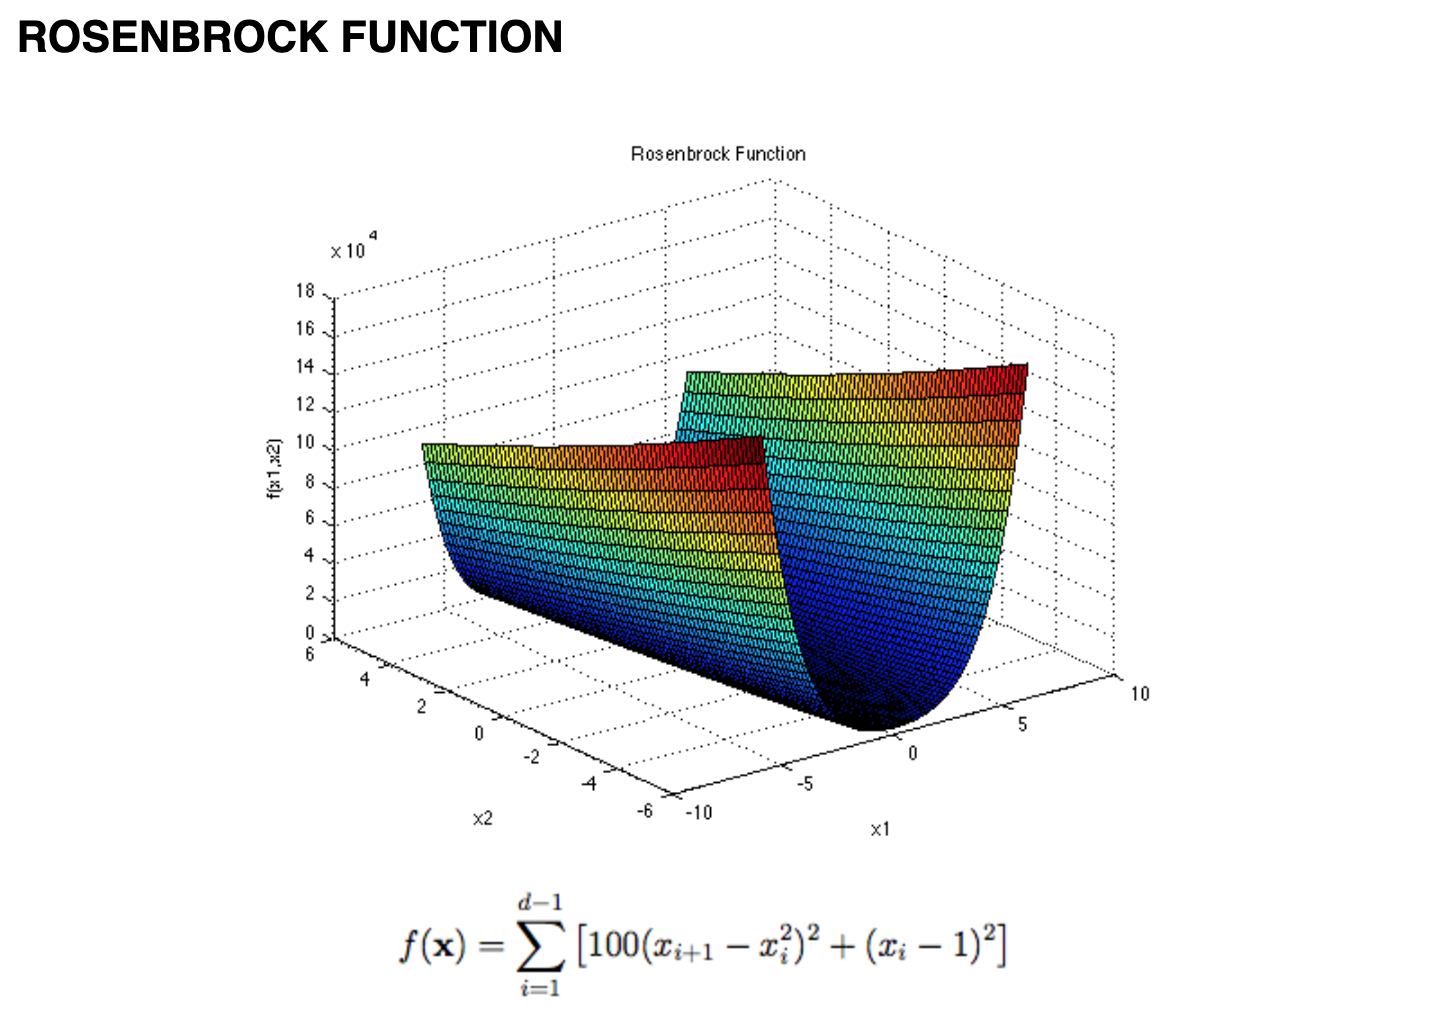

In [120]:
f = functions.rosenbrock

num_trials = 10
num_iterations = 10000
lr = 0.001
dims = 2
bound = 2

In [121]:
vanilla = VanillaGradientDescent(f, num_iterations, lr, bound=bound, dims=dims)
vanilla_exp = Experiment(vanilla, f, num_trials)
vanilla_exp.run()

In [122]:
lr = 1e-4
momentum = MomentumGradientDescent(f, num_iterations, lr, bound=bound, dims=dims)
momentum_exp = Experiment(momentum, f, num_trials)
momentum_exp.run()

In [123]:
lr = 1e-4
adam = AdamGradientDescent(f, num_iterations, lr, bound=bound, dims=dims)
adam_exp = Experiment(adam, f, num_trials)
adam_exp.run()

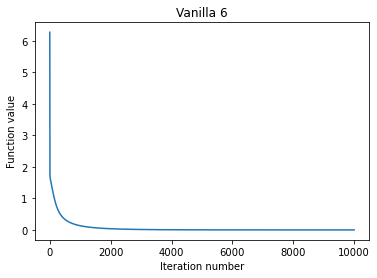

23.147082805633545 10000


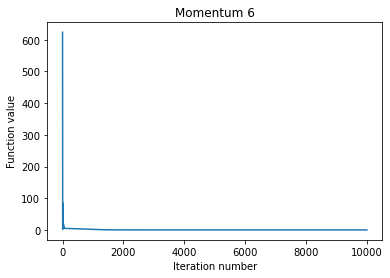

29.077787160873413 10000


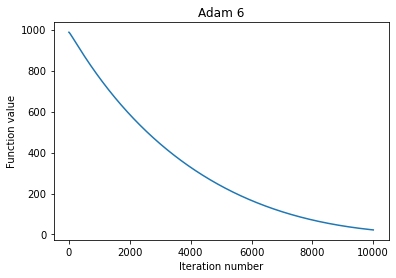

27.471117734909058 10000


In [124]:
trial_to_plot = np.random.choice(range(num_trials))

vanilla_exp.plot_trial(trial_to_plot, title='Vanilla ' + str(trial_to_plot))
momentum_exp.plot_trial(trial_to_plot, title='Momentum ' + str(trial_to_plot))
adam_exp.plot_trial(trial_to_plot, title='Adam ' + str(trial_to_plot))

In [125]:
print('Vanilla results:', vanilla_exp.average_stats())
print('Momentum results:', momentum_exp.average_stats())
print('Adam results:', adam_exp.average_stats())

Vanilla results: (24.0913348197937, 10000.0, 0.0001756109595526352, 1.9125909445068974e-06)
Momentum results: (29.815071129798888, 10000.0, 0.00016456711078995326, 1.4927220377448643e-05)
Adam results: (21.55464165210724, 7094.7, 92.30821444952937, 0.0878613769983475)


Результаты оказались достаточно плохими. Все базовые методы имели запуск, при котором не сошлись к минимуму. Хуже всех показал себя Adam. Даже в лучшем запуске алгоритм не сошелся к минимуму.

In [126]:
lr = 0.0001
num_iterations=100

global_desc = GlobalGradientDescent(f, num_iterations, lr, dims=dims, bound=bound, global_opt=0)
global_exp = Experiment(global_desc, f, num_trials)
global_exp.run()

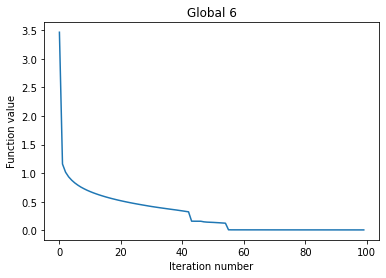

50.75264811515808 100


In [127]:
global_exp.plot_trial(trial_to_plot, title='Global ' + str(trial_to_plot))

In [128]:
print('Global results:', global_exp.average_stats())

Global results: (38.98131411075592, 83.1, 0.03769876570765142, 5.453923628919693e-07)


Тут результат оказался неожиданным. Глобальный алгоритм работал хуже, чем базовый градиентный спуск и моментум. Хотя и смог при лучшем запуске сойтись к минимуму.

In [129]:
lr = 0.001
num_iterations=100

random = RandomVectorDescent(f, num_iterations, lr, dims=dims, bound=bound, num_vectors=10, global_opt=0)
random_exp = Experiment(random, f, num_trials)
random_exp.run()

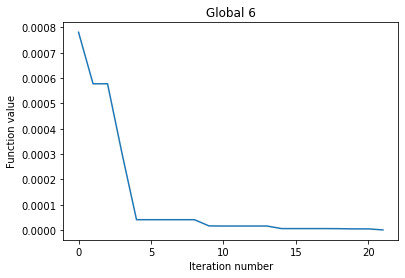

9.978830814361572 22


In [130]:
random_exp.plot_trial(trial_to_plot, title='Global ' + str(trial_to_plot))

In [131]:
print('Random results:', random_exp.average_stats())

Random results: (10.21119511127472, 18.5, 9.614060903672022e-07, 1.0232063827208487e-09)


На данной задаче алгоритм случайных векторов сработал лучше всех. В среднем он срабатывал быстрее остальных алгоритмов. Кроме того это единственный метод, который сошелся к минимуму во всех запусках.

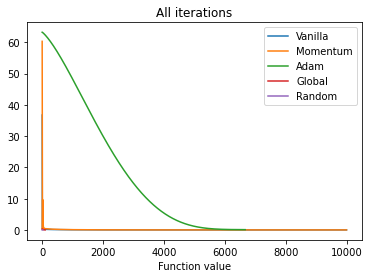

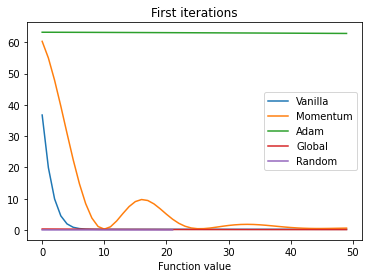

In [139]:
trial = np.random.choice(range(num_trials))
plt.plot(vanilla_exp.trial_stats[trial]['function_values'], label='Vanilla')
plt.plot(momentum_exp.trial_stats[trial]['function_values'], label='Momentum')
plt.plot(adam_exp.trial_stats[trial]['function_values'], label='Adam')
plt.plot(global_exp.trial_stats[trial]['function_values'], label='Global')
plt.plot(random_exp.trial_stats[trial]['function_values'], label='Random')

plt.title('All iterations')
plt.xlabel('Iteraion')
plt.xlabel('Function value')

plt.legend()
plt.show()

plt.plot(vanilla_exp.trial_stats[trial]['function_values'][:50], label='Vanilla')
plt.plot(momentum_exp.trial_stats[trial]['function_values'][:50], label='Momentum')
plt.plot(adam_exp.trial_stats[trial]['function_values'][:50], label='Adam')
plt.plot(global_exp.trial_stats[trial]['function_values'][:50], label='Global')
plt.plot(random_exp.trial_stats[trial]['function_values'][:50], label='Random')

plt.title('First iterations')
plt.xlabel('Iteraion')
plt.xlabel('Function value')

plt.legend()
plt.show()

### Ackley function

Ackley function представляет собой функцию с большим количесвтом локальных минимумов. Ожидается, что все базовые алгоритмы будут сходится к локальным, а не глобальным минимумам.
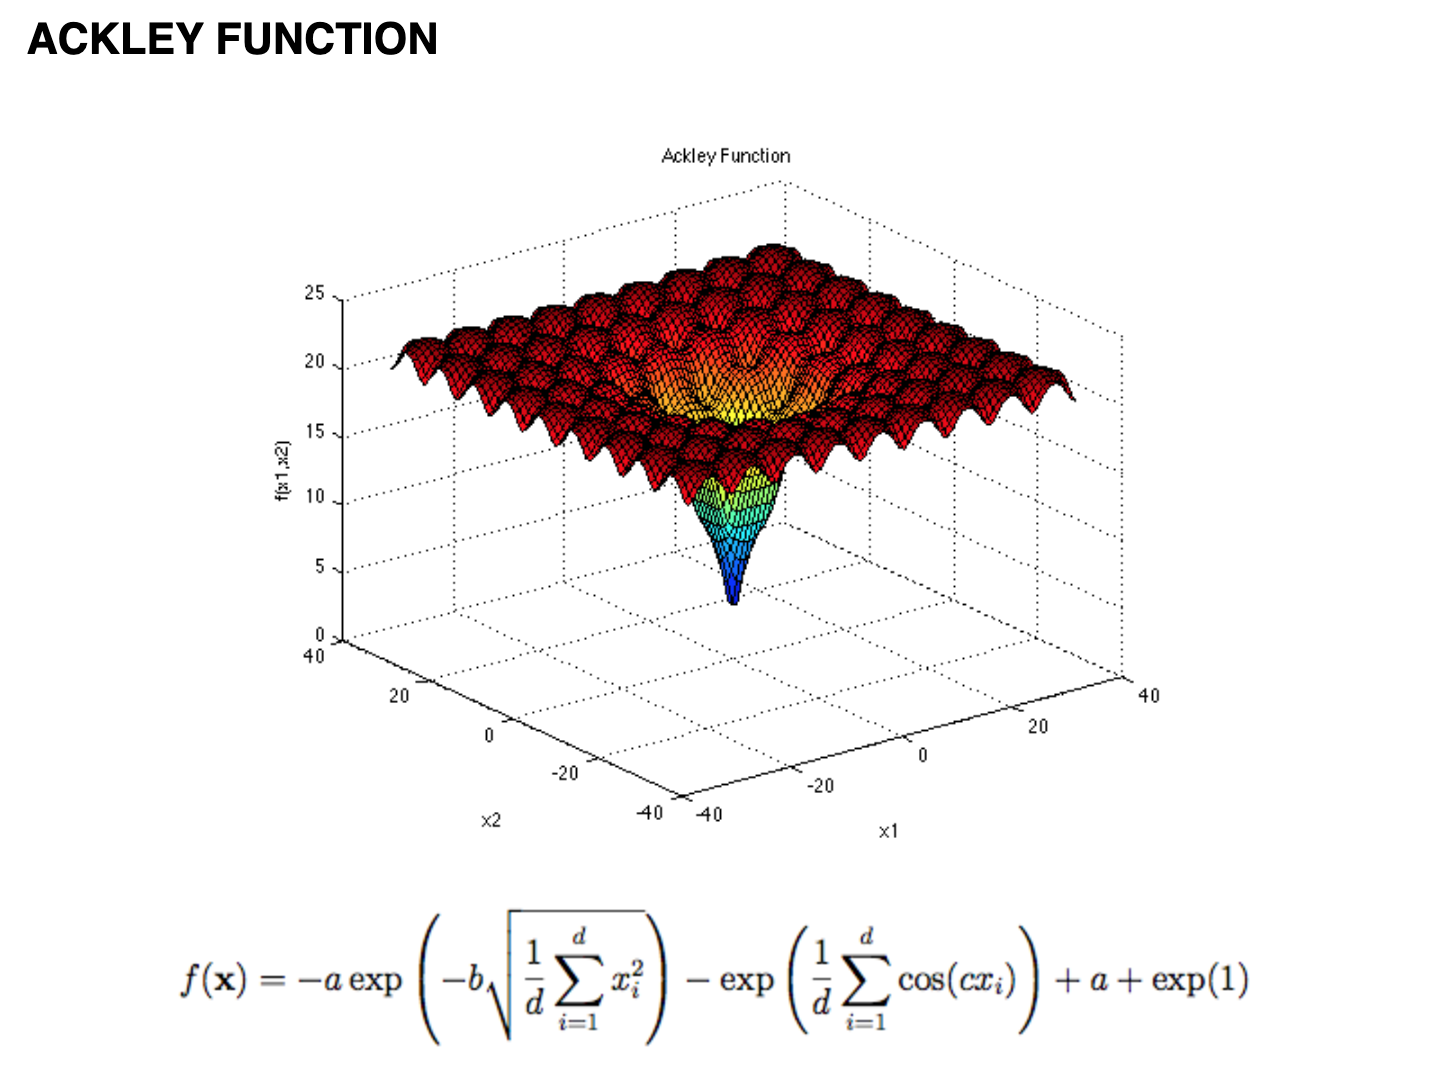

In [177]:
f = functions.ackley_f

num_trials = 10
num_iterations = 10000
lr = 0.01
dims = 2
bound = 32

In [178]:
vanilla = VanillaGradientDescent(f, num_iterations, lr, bound=bound, dims=dims)
vanilla_exp = Experiment(vanilla, f, num_trials)
vanilla_exp.run()

In [179]:
lr = 1e-3
momentum = MomentumGradientDescent(f, num_iterations, lr, bound=bound, dims=dims)
momentum_exp = Experiment(momentum, f, num_trials)
momentum_exp.run()

In [180]:
adam = AdamGradientDescent(f, num_iterations, lr, bound=bound, dims=dims)
adam_exp = Experiment(adam, f, num_trials)
adam_exp.run()

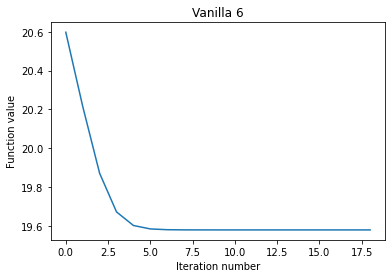

0.058362722396850586 19


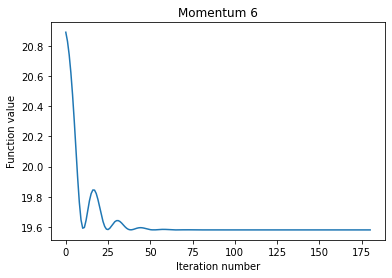

0.5287919044494629 181


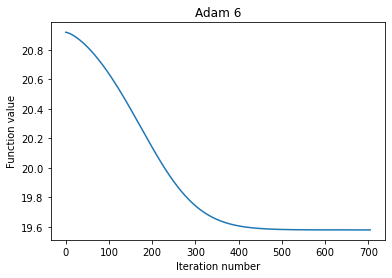

1.9788191318511963 705


In [181]:
trial_to_plot = np.random.choice(range(num_trials))

vanilla_exp.plot_trial(trial_to_plot, title='Vanilla ' + str(trial_to_plot))
momentum_exp.plot_trial(trial_to_plot, title='Momentum ' + str(trial_to_plot))
adam_exp.plot_trial(trial_to_plot, title='Adam ' + str(trial_to_plot))

In [182]:
print('Vanilla results:', vanilla_exp.average_stats())
print('Momentum results:', momentum_exp.average_stats())
print('Adam results:', adam_exp.average_stats())

Vanilla results: (0.06294710636138916, 19.1, 19.912619446771807, 16.967153173975433)
Momentum results: (0.5801491975784302, 170.5, 19.912619605040057, 16.967153186646776)
Adam results: (1.791346025466919, 602.8, 19.912625672871325, 16.967162860702416)


Как и ожидалось даже в самом простом двумерном случае все базовые алгоритмы сошлись к одному из локальных минимумов во всех запусках. В дальнейших экспериментах с локальными минимумами тестироваться будут только $2$ глобальных метода. 

In [189]:
lr = 0.1
num_iterations=1000

global_desc = GlobalGradientDescent(f, num_iterations, lr, dims=dims, bound=bound, global_opt=0)
global_exp = Experiment(global_desc, f, num_trials)
global_exp.run()

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

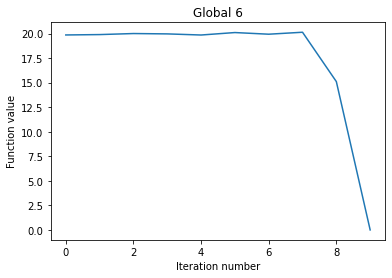

0.04097700119018555 10


In [190]:
global_exp.plot_trial(trial_to_plot, title='Global ' + str(trial_to_plot))

In [191]:
print('Global results:', global_exp.average_stats())

Global results: (0.02007894515991211, 4.0, 2.278177646530821e-13, 3.9968028886505635e-15)


In [192]:
lr = 0.1
num_iterations=1000

random = RandomVectorDescent(f, num_iterations, lr, dims=dims, bound=bound, num_vectors=10, global_opt=0)
random_exp = Experiment(random, f, num_trials)
random_exp.run()

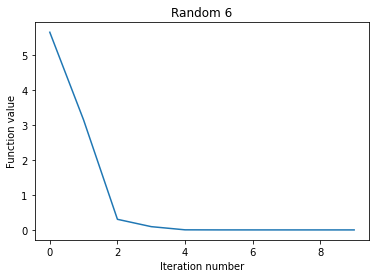

0.061493873596191406 10


In [193]:
random_exp.plot_trial(trial_to_plot, title='Random ' + str(trial_to_plot))

In [194]:
print('Random results:', random_exp.average_stats())

Random results: (0.05536298751831055, 8.1, 9.407867058719432e-07, 1.2979353147812844e-08)


Оба глобальных метода легко справились с задачей. Они сошлись к минимуму во всех запусках и в среднем работали меньше чем за $0.1$ секунды.

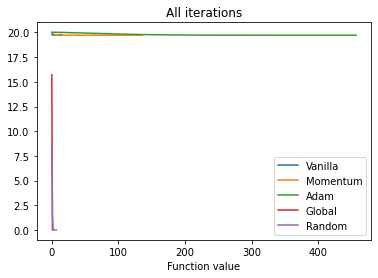

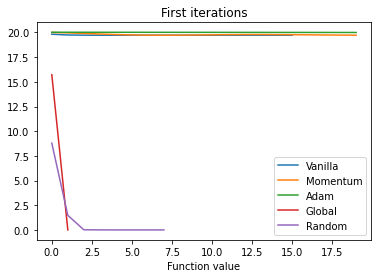

In [195]:
trial = np.random.choice(range(num_trials))
plt.plot(vanilla_exp.trial_stats[trial]['function_values'], label='Vanilla')
plt.plot(momentum_exp.trial_stats[trial]['function_values'], label='Momentum')
plt.plot(adam_exp.trial_stats[trial]['function_values'], label='Adam')
plt.plot(global_exp.trial_stats[trial]['function_values'], label='Global')
plt.plot(random_exp.trial_stats[trial]['function_values'], label='Random')

plt.title('All iterations')
plt.xlabel('Iteraion')
plt.xlabel('Function value')

plt.legend()
plt.show()

plt.plot(vanilla_exp.trial_stats[trial]['function_values'][:20], label='Vanilla')
plt.plot(momentum_exp.trial_stats[trial]['function_values'][:20], label='Momentum')
plt.plot(adam_exp.trial_stats[trial]['function_values'][:20], label='Adam')
plt.plot(global_exp.trial_stats[trial]['function_values'][:20], label='Global')
plt.plot(random_exp.trial_stats[trial]['function_values'][:20], label='Random')

plt.title('First iterations')
plt.xlabel('Iteraion')
plt.xlabel('Function value')

plt.legend()
plt.show()

In [196]:
f = functions.ackley_f

num_trials = 10
num_iterations = 10000
lr = 0.01
dims = 5
bound = 32

In [197]:
lr = 0.1
num_iterations=1000

global_desc = GlobalGradientDescent(f, num_iterations, lr, dims=dims, bound=bound, global_opt=0)
global_exp = Experiment(global_desc, f, num_trials)
global_exp.run()

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

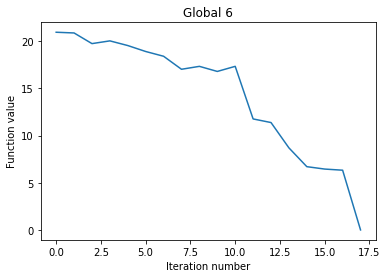

0.1526660919189453 18


In [198]:
global_exp.plot_trial(trial_to_plot, title='Global ' + str(trial_to_plot))

In [199]:
print('Global results:', global_exp.average_stats())

Global results: (3.25361704826355, 409.3, 19.94034994428083, 1.4654943925052066e-14)


Для большей размерности результаты оказались хуже: появились зауски, при которых алгоритм не сошелся к минимуму.

In [200]:
lr = 0.1
num_iterations=1000

random = RandomVectorDescent(f, num_iterations, lr, dims=dims, bound=bound, num_vectors=10, global_opt=0)
random_exp = Experiment(random, f, num_trials)
random_exp.run()

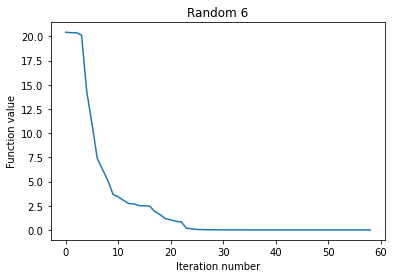

0.3543400764465332 59


In [201]:
random_exp.plot_trial(trial_to_plot, title='Random ' + str(trial_to_plot))

In [202]:
print('Random results:', random_exp.average_stats())

Random results: (0.631976580619812, 88.2, 9.904968014673443e-07, 6.56747570548788e-07)


Алгоритм случайных векторов работал дольше, чем в двухмерном случае, но все еще сошелся к минимуму во всех запусках.

In [206]:
f = functions.ackley_f

num_trials = 10
num_iterations = 10000
lr = 0.1
dims = 10
bound = 32

In [207]:
lr = 0.1
num_iterations = 1000

global_desc = GlobalGradientDescent(f, num_iterations, lr, dims=dims, bound=bound, global_opt=0)
global_exp = Experiment(global_desc, f, num_trials)
global_exp.run()

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

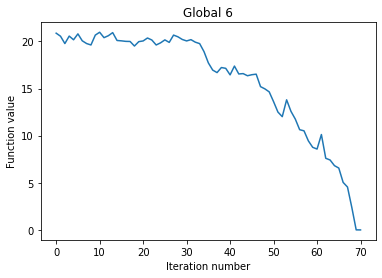

1.3198747634887695 71


In [208]:
global_exp.plot_trial(trial_to_plot, title='Global ' + str(trial_to_plot))

In [209]:
print('Global results:', global_exp.average_stats())

Global results: (6.329011249542236, 342.0, 20.024245694544977, 7.549516567451064e-15)


In [210]:
lr = 0.1
num_iterations=1000

random = RandomVectorDescent(f, num_iterations, lr, dims=dims, bound=bound, num_vectors=10, global_opt=0)
random_exp = Experiment(random, f, num_trials)
random_exp.run()

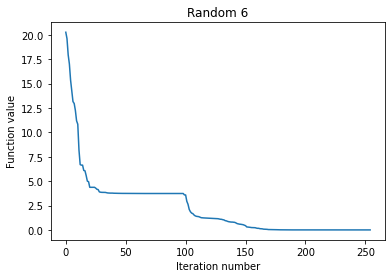

1.8921301364898682 255


In [211]:
random_exp.plot_trial(trial_to_plot, title='Random ' + str(trial_to_plot))

In [212]:
print('Random results:', random_exp.average_stats())

Random results: (6.079139018058777, 733.6, 2.3168487918475873, 7.230895318066644e-07)


In [213]:
f = functions.ackley_f

num_trials = 10
num_iterations = 10000
lr = 0.1
dims = 25
bound = 32

In [214]:
lr = 0.1
num_iterations = 1000

global_desc = GlobalGradientDescent(f, num_iterations, lr, dims=dims, bound=bound, global_opt=0)
global_exp = Experiment(global_desc, f, num_trials)
global_exp.run()

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

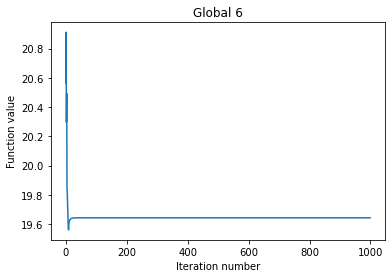

49.335878133773804 1000


In [215]:
global_exp.plot_trial(trial_to_plot, title='Global ' + str(trial_to_plot))

In [216]:
print('Global results:', global_exp.average_stats())

Global results: (32.888046169281004, 911.1, 20.236840671637047, 1.425526363618701e-13)


In [217]:
lr = 0.1
num_iterations=1000

random = RandomVectorDescent(f, num_iterations, lr, dims=dims, bound=bound, num_vectors=10, global_opt=0)
random_exp = Experiment(random, f, num_trials)
random_exp.run()

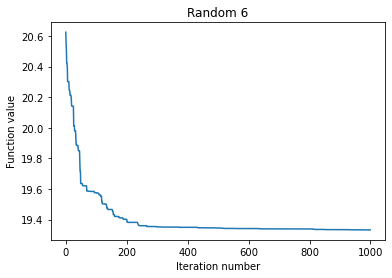

8.318171977996826 1000


In [218]:
random_exp.plot_trial(trial_to_plot, title='Random ' + str(trial_to_plot))

In [219]:
print('Random results:', random_exp.average_stats())

Random results: (8.647144198417664, 1000.0, 19.758625236566193, 2.814049599826593)


In [220]:
f = functions.ackley_f

num_trials = 10
num_iterations = 10000
lr = 0.1
dims = 25
bound = 32

In [221]:
lr = 0.1
num_iterations = 1000

global_desc = GlobalGradientDescent(f, num_iterations, lr, dims=dims, bound=bound, global_opt=0)
global_exp = Experiment(global_desc, f, num_trials)
global_exp.run()

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

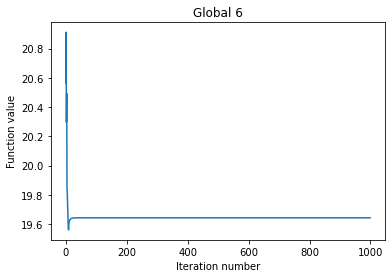

29.885112762451172 1000


In [222]:
global_exp.plot_trial(trial_to_plot, title='Global ' + str(trial_to_plot))

In [223]:
print('Global results:', global_exp.average_stats())

Global results: (27.324428248405457, 911.1, 20.236840671637047, 1.425526363618701e-13)


In [224]:
lr = 0.1
num_iterations=1000

random = RandomVectorDescent(f, num_iterations, lr, dims=dims, bound=bound, num_vectors=10, global_opt=0)
random_exp = Experiment(random, f, num_trials)
random_exp.run()

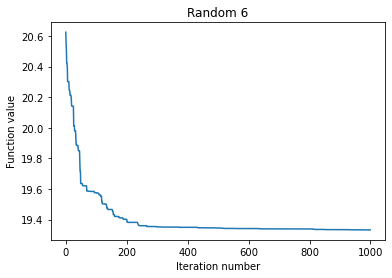

8.166725873947144 1000


In [225]:
random_exp.plot_trial(trial_to_plot, title='Random ' + str(trial_to_plot))

In [226]:
print('Random results:', random_exp.average_stats())

Random results: (8.337665724754334, 1000.0, 19.758625236566193, 2.814049599826593)


In [286]:
f = functions.ackley_f

num_trials = 10
num_iterations = 10000
lr = 0.1
dims = 100
bound = 32

In [287]:
lr = 0.1
num_iterations = 1000

global_desc = GlobalGradientDescent(f, num_iterations, lr, dims=dims, bound=bound, global_opt=0)
global_exp = Experiment(global_desc, f, num_trials)
global_exp.run()

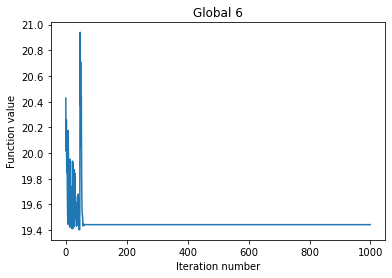

184.47475910186768 1000


In [288]:
global_exp.plot_trial(trial_to_plot, title='Global ' + str(trial_to_plot))

In [289]:
print('Global results:', global_exp.average_stats())

Global results: (154.31070718765258, 1000.0, 19.829147618967312, 19.339146209429632)


In [290]:
lr = 0.1
num_iterations=1000

random = RandomVectorDescent(f, num_iterations, lr, dims=dims, bound=bound, num_vectors=10, global_opt=0)
random_exp = Experiment(random, f, num_trials)
random_exp.run()

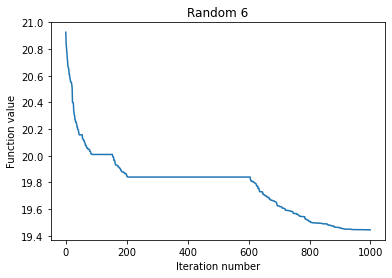

9.940160036087036 1000


In [291]:
random_exp.plot_trial(trial_to_plot, title='Random ' + str(trial_to_plot))

In [292]:
print('Random results:', random_exp.average_stats())

Random results: (10.781894564628601, 1000.0, 19.793273106472405, 19.348810710140576)


Для $100$-мерного варианта функции, оба метода не сошлись к минимуму за выделенное число итераций.

### Griewank

Вторая функция с локальными минимумами была griewank function. Она представляет собой функцию с большим количеством равномерно распределенных локальных минимумов.
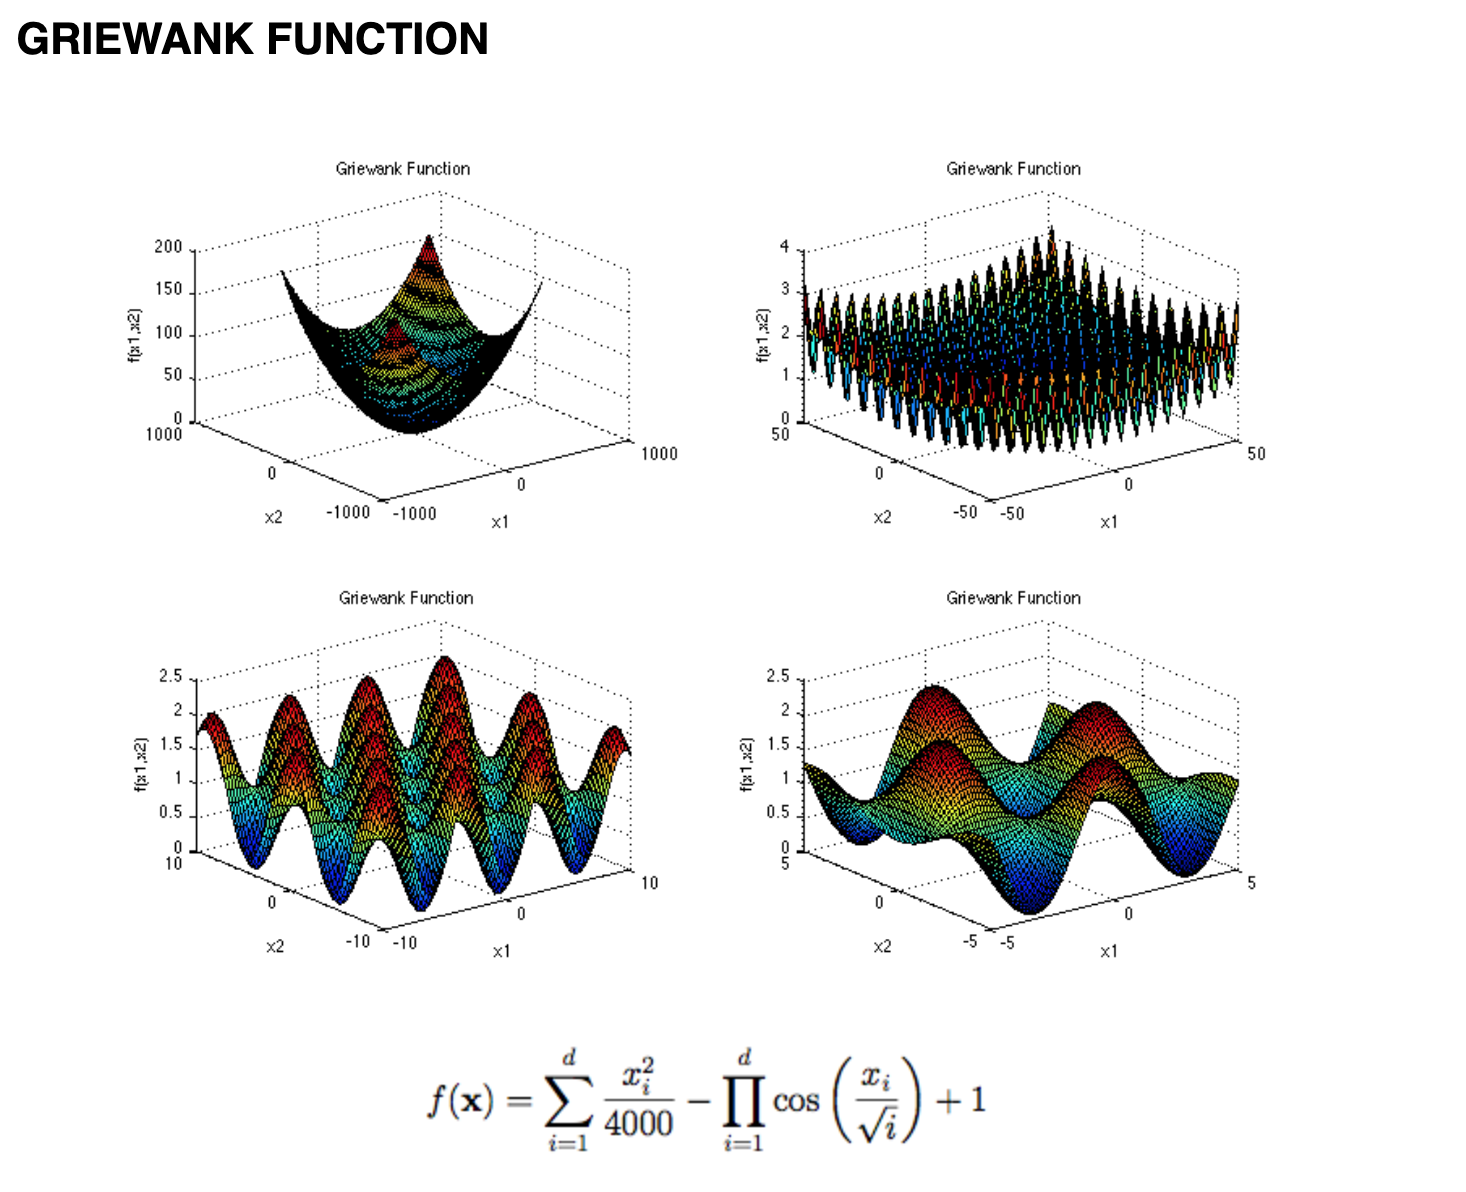

In [227]:
f = functions.griewank

num_trials = 10
num_iterations = 10000
lr = 0.01
dims = 10
bound = 600

In [228]:
num_iterations = 1000

global_desc = GlobalGradientDescent(f, num_iterations, lr, dims=dims, bound=bound, global_opt=0)
global_exp = Experiment(global_desc, f, num_trials)
global_exp.run()

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[

/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (-a - p[i]) / d[i]
/Users/V/PycharmProjects/Gradient optimization/global_gradient_methods.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  t_tmp = (a - p[

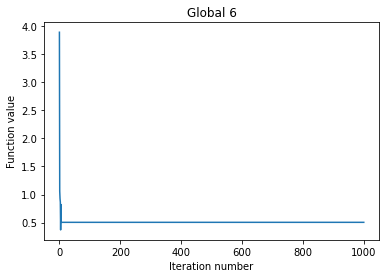

17.381803035736084 1000


In [229]:
global_exp.plot_trial(trial_to_plot, title='Global ' + str(trial_to_plot))

In [230]:
print('Global results:', global_exp.average_stats())

Global results: (15.49242980480194, 801.1, 1.0217295338611194, 2.917334807062133e-08)


In [231]:
num_iterations=1000

random = RandomVectorDescent(f, num_iterations, lr, dims=dims, bound=bound, num_vectors=10, global_opt=0)
random_exp = Experiment(random, f, num_trials)
random_exp.run()

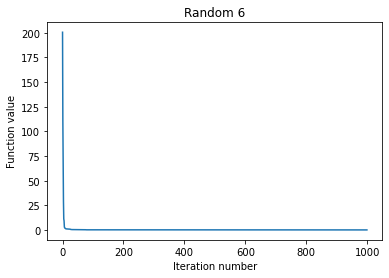

69.60832929611206 1000


In [232]:
random_exp.plot_trial(trial_to_plot, title='Random ' + str(trial_to_plot))

In [233]:
print('Random results:', random_exp.average_stats())

Random results: (78.40422158241272, 1000.0, 0.7131511067530875, 0.08623462201956156)


Первый метод для данной функции сработал лучше. В среднем он сходился быстрее. Кроме того у метода случайных векторов не было ни одного запуска, при котором он бы сошелся к минимуму.

### De Jong 5

Функция Де Джонга $5$ представляет собой по большей части ровную поверхность с резкими падениями.
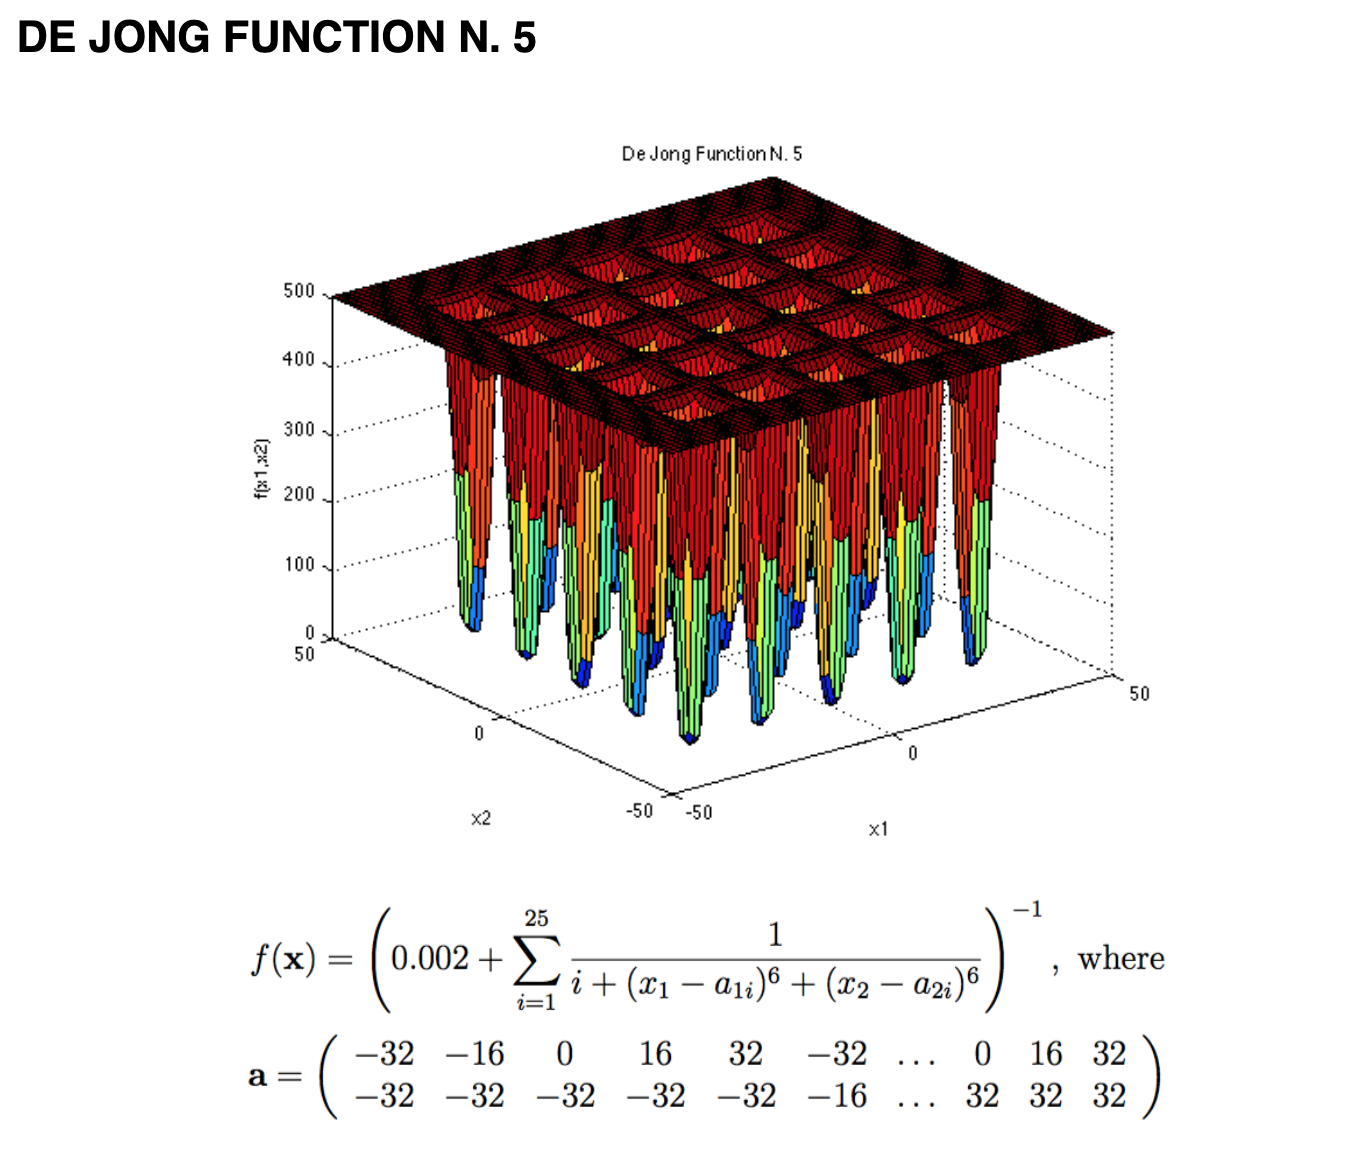

In [241]:
f = functions.de_jong5

num_trials = 10
num_iterations = 10000
lr = 0.01
dims = 2
bound = 65

In [242]:
vanilla = VanillaGradientDescent(f, num_iterations, lr, bound=bound, dims=dims)
vanilla_exp = Experiment(vanilla, f, num_trials)
vanilla_exp.run()

In [243]:
momentum = MomentumGradientDescent(f, num_iterations, lr, bound=bound, dims=dims)
momentum_exp = Experiment(momentum, f, num_trials)
momentum_exp.run()

In [244]:
adam = AdamGradientDescent(f, num_iterations, lr, bound=bound, dims=dims)
adam_exp = Experiment(adam, f, num_trials)
adam_exp.run()

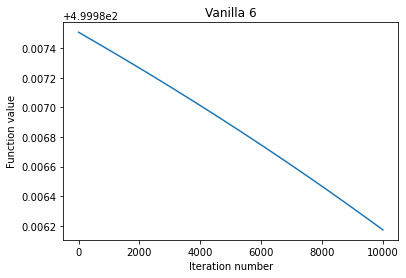

45.020078897476196 10000


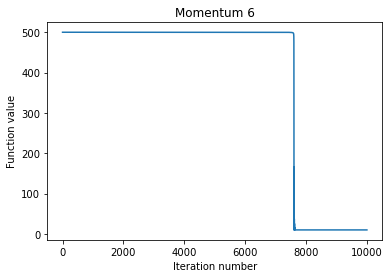

41.713762044906616 10000


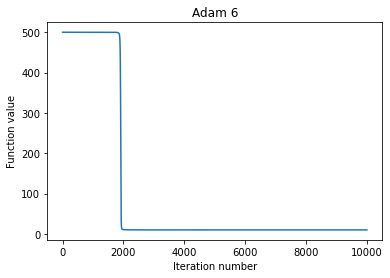

50.2953941822052 10000


In [247]:
trial_to_plot = np.random.choice(range(num_trials))

vanilla_exp.plot_trial(trial_to_plot, title='Vanilla ' + str(trial_to_plot))
momentum_exp.plot_trial(trial_to_plot, title='Momentum ' + str(trial_to_plot))
adam_exp.plot_trial(trial_to_plot, title='Adam ' + str(trial_to_plot))

In [246]:
print('Vanilla results:', vanilla_exp.average_stats())
print('Momentum results:', momentum_exp.average_stats())
print('Adam results:', adam_exp.average_stats())

Vanilla results: (43.70951597690582, 10000.0, 499.99932569110143, 21.072704162141747)
Momentum results: (42.87451467514038, 10000.0, 499.99931537434395, 9.803899007542288)
Adam results: (29.944854927062988, 6000.4, 499.999326815616, 1.9925439302050503)


Из базовых методов лучше всех с оптимизацией данной функции справился Adam. Но все $3$ алгоритма были далеко от минимума и работали долго.

In [249]:
num_iterations = 1000
lr = 0.1

global_desc = GlobalGradientDescent(f, num_iterations, lr, dims=dims, bound=bound, global_opt=0)
global_exp = Experiment(global_desc, f, num_trials)
global_exp.run()

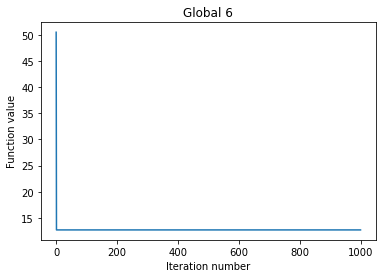

5.883549213409424 1000


In [250]:
global_exp.plot_trial(trial_to_plot, title='Global ' + str(trial_to_plot))

In [253]:
print('Global results:', global_exp.average_stats())

Global results: (5.24070098400116, 1000.0, 322.61322323968767, 12.67050581288598)


В случае глобального алгоритма результаты оказались противоречивы. Он работал в среднем быстрее базовых методов, но тоже не смог сойтись к глобальному методу.

In [251]:
num_iterations=1000

random = RandomVectorDescent(f, num_iterations, lr, dims=dims, bound=bound, num_vectors=10, global_opt=0)
random_exp = Experiment(random, f, num_trials)
random_exp.run()

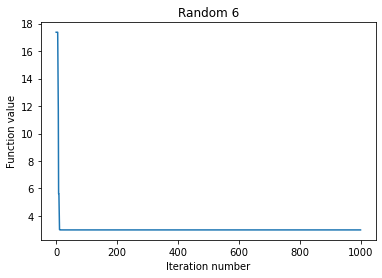

8.818363904953003 1000


In [252]:
random_exp.plot_trial(trial_to_plot, title='Random ' + str(trial_to_plot))

In [254]:
print('Random results:', random_exp.average_stats())

Random results: (11.761907267570496, 1000.0, 12.67050581286792, 0.9980038379449012)


Лучше всех с данной задачей справился метод случайных веткоров. Он работал быстрее базовых методов и был ближе всех к минимуму.

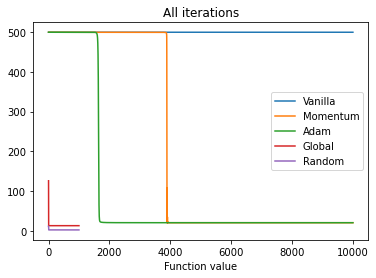

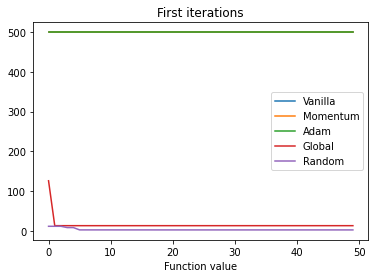

In [260]:
trial = np.random.choice(range(num_trials))
plt.plot(vanilla_exp.trial_stats[trial]['function_values'], label='Vanilla')
plt.plot(momentum_exp.trial_stats[trial]['function_values'], label='Momentum')
plt.plot(adam_exp.trial_stats[trial]['function_values'], label='Adam')
plt.plot(global_exp.trial_stats[trial]['function_values'], label='Global')
plt.plot(random_exp.trial_stats[trial]['function_values'], label='Random')

plt.title('All iterations')
plt.xlabel('Iteraion')
plt.xlabel('Function value')

plt.legend()
plt.show()

plt.plot(vanilla_exp.trial_stats[trial]['function_values'][:50], label='Vanilla')
plt.plot(momentum_exp.trial_stats[trial]['function_values'][:50], label='Momentum')
plt.plot(adam_exp.trial_stats[trial]['function_values'][:50], label='Adam')
plt.plot(global_exp.trial_stats[trial]['function_values'][:50], label='Global')
plt.plot(random_exp.trial_stats[trial]['function_values'][:50], label='Random')

plt.title('First iterations')
plt.xlabel('Iteraion')
plt.xlabel('Function value')

plt.legend()
plt.show()

### Zakharov function

Функция Захарова представляет собой функцию, где большая часть представляет собой плато. Она имеет только один локальный, он же глобальный, минимум.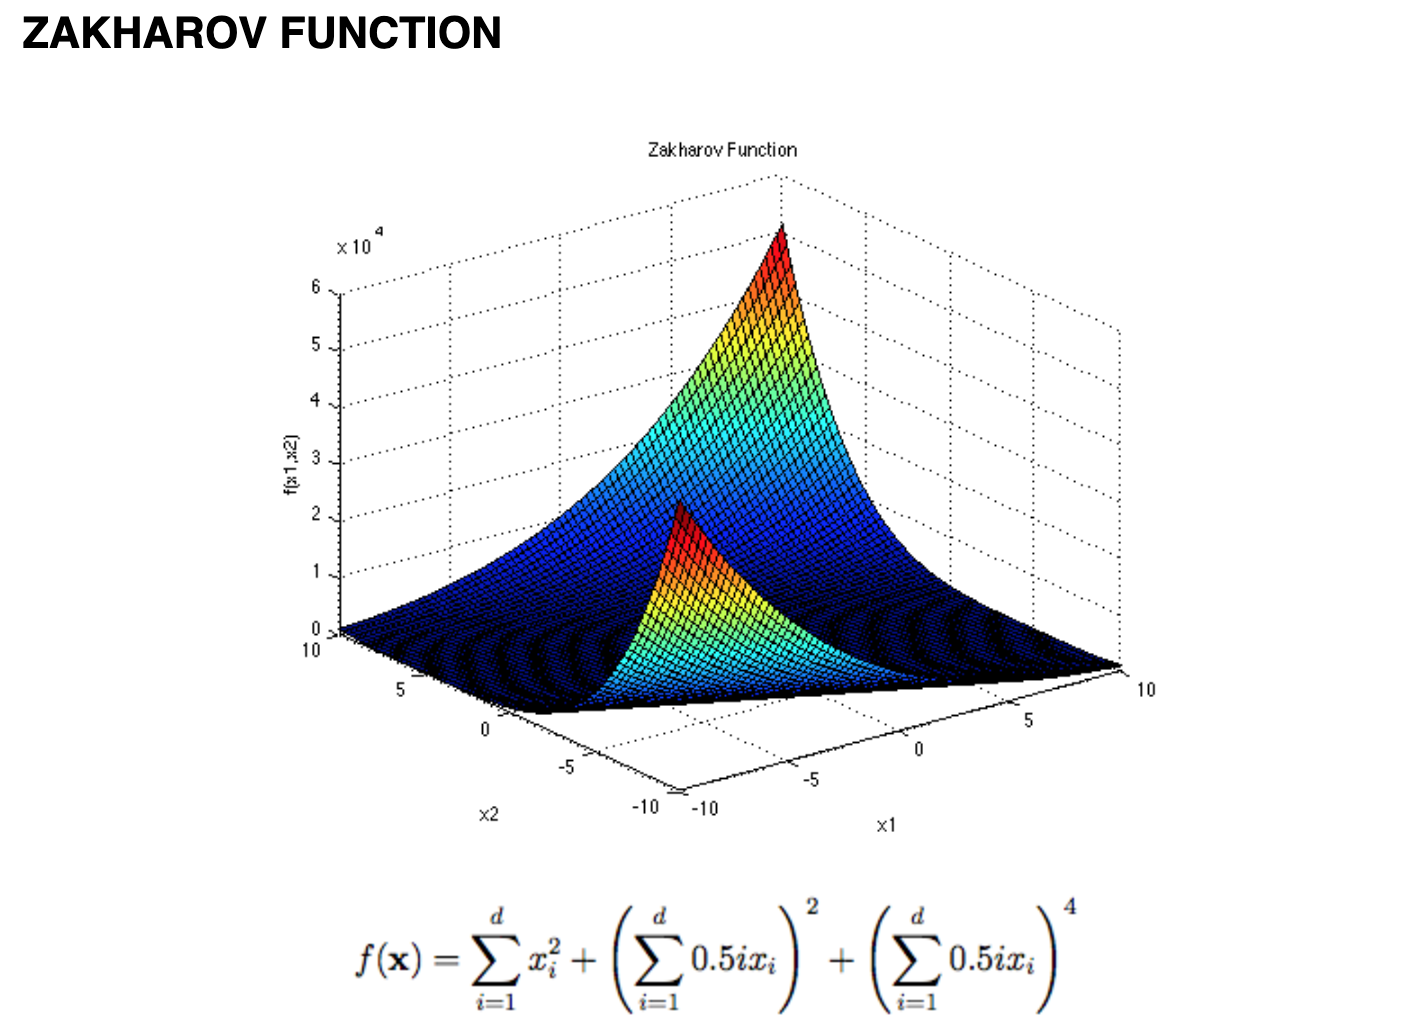

In [270]:
f = functions.zakharov

num_trials = 10
num_iterations = 1000
lr = 0.01
dims = 2
bound = 5

In [271]:
vanilla = VanillaGradientDescent(f, num_iterations, lr, bound=bound, dims=dims)
vanilla_exp = Experiment(vanilla, f, num_trials)
vanilla_exp.run()

Cost explosion, trying with lower learning rate
Learning rate changed to 0.0
Cost explosion, trying with lower learning rate
Learning rate changed to 0.0
Cost explosion, trying with lower learning rate
Learning rate changed to 0.0
Cost explosion, trying with lower learning rate
Learning rate changed to 0.0
Cost explosion, trying with lower learning rate
Learning rate changed to 0.0


In [272]:
momentum = MomentumGradientDescent(f, num_iterations, lr, bound=bound, dims=dims)
momentum_exp = Experiment(momentum, f, num_trials)
momentum_exp.run()

Cost explosion, trying with lower learning rate
Learning rate changed to 0.0
Cost explosion, trying with lower learning rate
Learning rate changed to 0.0


In [273]:
adam = AdamGradientDescent(f, num_iterations, lr, bound=bound, dims=dims)
adam_exp = Experiment(adam, f, num_trials)
adam_exp.run()

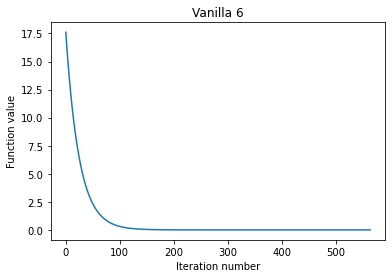

18.46701979637146 564


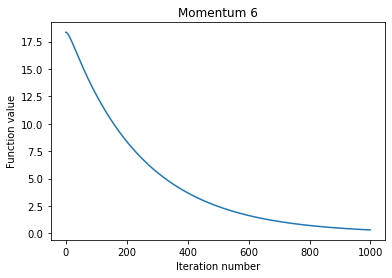

15.837733745574951 1000


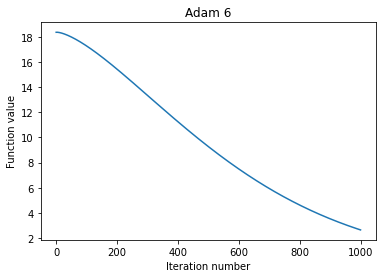

15.278718948364258 1000


In [274]:
trial_to_plot = np.random.choice(range(num_trials))

vanilla_exp.plot_trial(trial_to_plot, title='Vanilla ' + str(trial_to_plot))
momentum_exp.plot_trial(trial_to_plot, title='Momentum ' + str(trial_to_plot))
adam_exp.plot_trial(trial_to_plot, title='Adam ' + str(trial_to_plot))

In [275]:
print('Vanilla results:', vanilla_exp.average_stats())
print('Momentum results:', momentum_exp.average_stats())
print('Adam results:', adam_exp.average_stats())

Vanilla results: (10.955747890472413, 521.2, 3.208088773693652e+109, 2.3062364120960786e-09)
Momentum results: (20.01667454242706, 842.1, 0.44867443740976143, 3.970877189891708e-09)
Adam results: (15.741092777252197, 1000.0, 15.417773301422121, 0.030766088636351226)


In [276]:
num_iterations = 1000
lr = 0.1

global_desc = GlobalGradientDescent(f, num_iterations, lr, dims=dims, bound=bound, global_opt=0)
global_exp = Experiment(global_desc, f, num_trials)
global_exp.run()

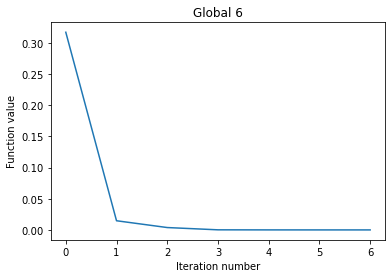

0.05484127998352051 7


In [277]:
global_exp.plot_trial(trial_to_plot, title='Global ' + str(trial_to_plot))

In [278]:
print('Global results:', global_exp.average_stats())

Global results: (0.06287493705749511, 7.8, 8.75142384563117e-07, 1.1710685055713676e-07)


In [279]:
num_iterations=1000

random = RandomVectorDescent(f, num_iterations, lr, dims=dims, bound=bound, num_vectors=10, global_opt=0)
random_exp = Experiment(random, f, num_trials)
random_exp.run()

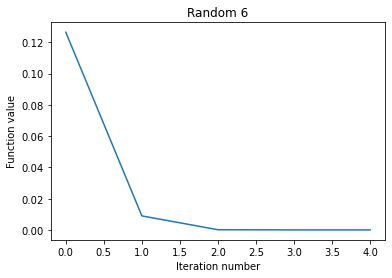

0.05475115776062012 5


In [280]:
random_exp.plot_trial(trial_to_plot, title='Random ' + str(trial_to_plot))

In [281]:
print('Random results:', random_exp.average_stats())

Random results: (0.06351845264434815, 4.0, 9.351432091649911e-07, 3.149843547113109e-10)


Оба глобальных метода гораздо лучше справились с задачей по сравнению с базовыми методами. Они сошлись во всех запусках, а среднее время работы было гораздо меньше.

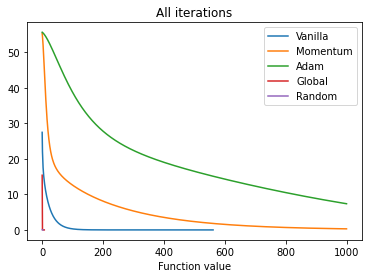

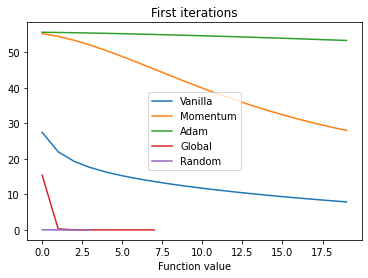

In [283]:
trial = np.random.choice(range(num_trials))
plt.plot(vanilla_exp.trial_stats[trial]['function_values'], label='Vanilla')
plt.plot(momentum_exp.trial_stats[trial]['function_values'], label='Momentum')
plt.plot(adam_exp.trial_stats[trial]['function_values'], label='Adam')
plt.plot(global_exp.trial_stats[trial]['function_values'], label='Global')
plt.plot(random_exp.trial_stats[trial]['function_values'], label='Random')

plt.title('All iterations')
plt.xlabel('Iteraion')
plt.xlabel('Function value')

plt.legend()
plt.show()

plt.plot(vanilla_exp.trial_stats[trial]['function_values'][:20], label='Vanilla')
plt.plot(momentum_exp.trial_stats[trial]['function_values'][:20], label='Momentum')
plt.plot(adam_exp.trial_stats[trial]['function_values'][:20], label='Adam')
plt.plot(global_exp.trial_stats[trial]['function_values'][:20], label='Global')
plt.plot(random_exp.trial_stats[trial]['function_values'][:20], label='Random')

plt.title('First iterations')
plt.xlabel('Iteraion')
plt.xlabel('Function value')

plt.legend()
plt.show()